In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import collections
%matplotlib inline

# Rank schools with my interests only

In [2]:
info_df = pd.read_csv('../CSrankings/generated-author-info.csv')
info_grouped = info_df.groupby('name')
info_grouped_dic = dict(list(info_grouped))

In [3]:
info_df[info_df['year'] > 2013]

,name,dept,area,count,adjustedcount,year
2,A. Aldo Faisal,Imperial College London,icra,1.0,0.333333,2016
3,A. Aldo Faisal,Imperial College London,nips,1.0,0.142857,2018
6,A. Ercument Cicek,Bilkent University,ismb,1.0,0.333333,2014
7,A. Jefferson Offutt,George Mason University,fse,1.0,0.166667,2016
29,A. Prasad Sistla,University of Illinois at Chicago,cav,1.0,0.250000,2018
35,A. Prasad Sistla,University of Illinois at Chicago,lics,1.0,0.500000,2016
36,A. Prasad Sistla,University of Illinois at Chicago,lics,1.0,0.333333,2017
45,A. Robert Calderbank,Duke University,cvpr,1.0,0.166667,2018
47,A. Robert Calderbank,Duke University,iccv,1.0,0.250000,2015
49,A. Robert Calderbank,Duke University,icml,1.0,0.200000,2014


In [4]:
info_by_dpt_dic = dict(list(info_df.groupby('dept')))

In [5]:
with open('area_rank.json') as f:
    area_rank_dic = json.load(f)

In [6]:
with open('area_map.json') as f:
    area_map = json.load(f)

In [7]:
interest_area = ['ML', 'AI', 'NLP', 'Vision', 'Comp']

In [8]:
area_dept_rank_dic = {}
for a in interest_area:
    _srs = pd.Series(area_rank_dic[a])
    sorted_srs = _srs.sort_values(ascending=False)[:100]
    _li = []
    for name in sorted_srs.index:
        _li.append(info_grouped_dic[name]['dept'].value_counts().index[0])
    li_count = collections.Counter(_li)
    area_dept_rank_dic[a] = dict(li_count.most_common(50))

In [14]:
sorted_school_df = pd.DataFrame(area_dept_rank_dic).sum(axis=1).sort_values(ascending=False)

In [21]:
pd.DataFrame(area_dept_rank_dic)['Comp'].dropna().sort_values(ascending=False)

Carnegie Mellon University                5.0
Massachusetts Institute of Technology     4.0
Tel Aviv University                       4.0
University of California - Los Angeles    4.0
Univ. of Illinois at Urbana-Champaign     3.0
University of California - San Diego      3.0
Pennsylvania State University             3.0
University of Toronto                     3.0
Max Planck Institute                      3.0
National University of Singapore          2.0
Duke University                           2.0
Princeton University                      2.0
Rice University                           2.0
McGill University                         2.0
Rutgers University                        2.0
Stony Brook University                    2.0
Texas A&M University                      2.0
Stanford University                       2.0
University of California - Riverside      2.0
University of Connecticut                 2.0
Brown University                          2.0
University of Washington          

In [10]:
info_by_dpt_dic['University of Maryland - College Park'].groupby('name').sum()['adjustedcount'].sort_values(ascending=False)

name
Larry S. Davis               44.534127
Rama Chellappa               37.116667
Dinesh Manocha               36.666667
Hal Daumé III                30.641342
Jonathan Katz                24.339683
David W. Jacobs              21.526623
Aravind Srinivasan           21.366667
Yiannis Aloimonos            21.276190
Mohammad Taghi Hajiaghayi    20.839683
Ming C. Lin                  16.608333
Hanan Samet                  15.583333
Amol Deshpande               15.400000
Philip Resnik                14.533333
Jordan L. Boyd-Graber        14.134524
Michael W. Hicks             11.209524
Ben Shneiderman              11.141667
Nick Roussopoulos            10.750000
Rance Cleaveland             10.500000
V. S. Subrahmanian           10.100000
Dana S. Nau                   9.400000
Daniel J. Abadi               9.122619
Jeffrey K. Hollingsworth      8.733333
Niklas Elmqvist               8.722619
Neil Spring                   8.269444
Eytan Ruppin                  7.626190
Douglas W. Oard     

# Filter only US schools

In [13]:
country_df = pd.read_csv('../CSrankings/country-info.csv', index_col=0)
country_df.head()

,region
institution,
Aalto University,europe
Aarhus University,europe
Aalborg University,europe
American University of Beirut,asia
Ariel University,europe


In [15]:
sorted_school_df.head()

Carnegie Mellon University                27.0
University of California - Berkeley       13.0
Massachusetts Institute of Technology     12.0
Stanford University                       12.0
University of California - Los Angeles    11.0
dtype: float64

In [43]:
len(sorted_school_df)

126

In [45]:
sorted_US_df = sorted_school_df.drop(country_df.index, errors='ignore')
sorted_US_df

Carnegie Mellon University                27.0
University of California - Berkeley       13.0
Massachusetts Institute of Technology     12.0
Stanford University                       12.0
University of California - Los Angeles    11.0
Cornell University                        11.0
University of California - San Diego       9.0
University of Maryland - College Park      9.0
Columbia University                        9.0
University of Texas at Austin              8.0
University of Pennsylvania                 8.0
Johns Hopkins University                   8.0
University of Michigan                     7.0
Univ. of Illinois at Urbana-Champaign      7.0
Rutgers University                         6.0
Brown University                           6.0
Georgia Institute of Technology            6.0
University of Washington                   5.0
Oregon State University                    4.0
University of California - Irvine          4.0
Duke University                            4.0
University of

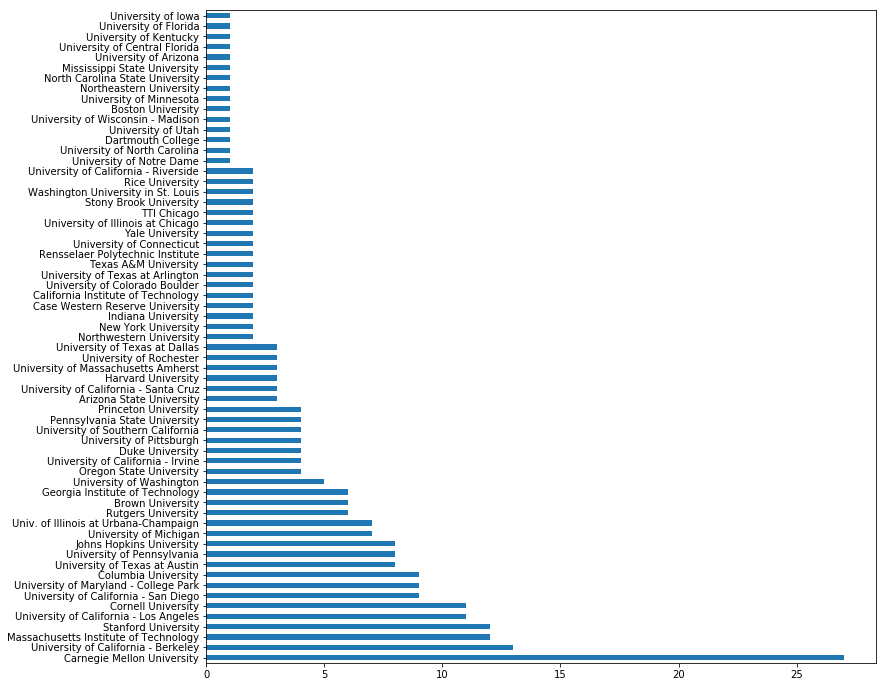

In [50]:
plt.figure(figsize=(12,12))
sorted_US_df.plot.barh()